In [1]:
import yfinance as yf
from IPython.display import display, HTML
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
printDF = lambda df: display(HTML(df.to_html())) #index=False

In [3]:
#https://pypi.org/project/yfinance/
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "^GDAXI",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "5y",

#         start="2015-01-01", 
        
#         end="2015-01-10",
    
        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d")

len(data)
data.head()

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2015-04-30  11440.790039  11570.639648  11331.370117  11454.379883   
2015-05-04  11506.839844  11656.889648  11411.769531  11619.849609   
2015-05-05  11576.120117  11751.219727  11322.620117  11327.679688   
2015-05-06  11377.580078  11457.929688  11239.860352  11350.150391   
2015-05-07  11265.129883  11437.570312  11167.549805  11407.969727   

               Adj Close     Volume  
Date                                 
2015-04-30  11454.379883  126690900  
2015-05-04  11619.849609   80328700  
2015-05-05  11327.679688  121580000  
2015-05-06  11350.150391  101726700  
2015-05-07  11407.969727  119253400

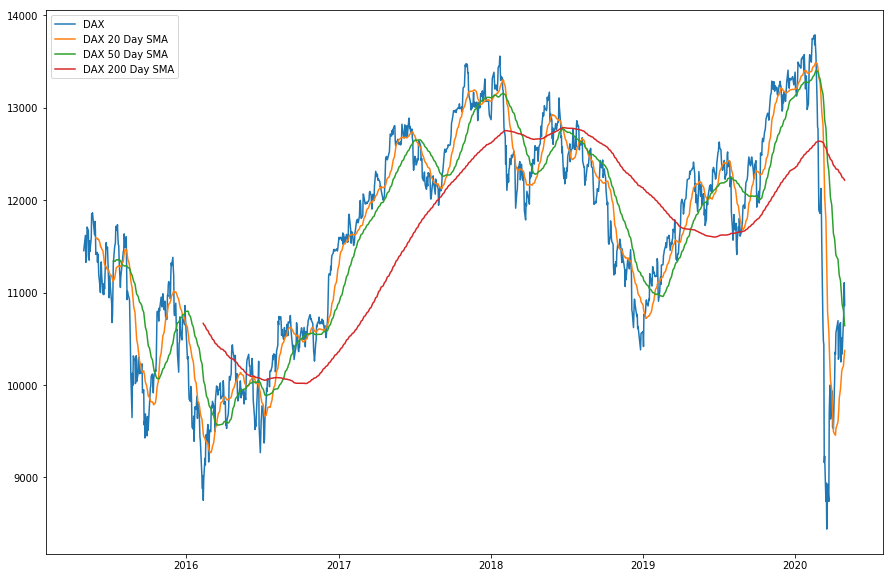

Open          High           Low         Close  \
Date                                                                 
2015-04-30  11440.790039  11570.639648  11331.370117  11454.379883   
2015-05-04  11506.839844  11656.889648  11411.769531  11619.849609   
2015-05-05  11576.120117  11751.219727  11322.620117  11327.679688   
2015-05-06  11377.580078  11457.929688  11239.860352  11350.150391   
2015-05-07  11265.129883  11437.570312  11167.549805  11407.969727   
...                  ...           ...           ...           ...   
2020-04-24  10299.309570  10486.469727  10299.309570  10336.089844   
2020-04-27  10551.070312  10660.360352  10523.099609  10659.990234   
2020-04-28  10658.469727  10897.820312  10651.580078  10795.629883   
2020-04-29  10812.740234  11125.349609  10789.519531  11107.740234   
2020-04-30  11195.209961  11235.570312  10839.299805  10861.639648   

               Adj Close     Volume    20 DAY SMA    50 DAY SMA   200 DAY SMA  
Date                                                                           
2015-04-30  11454.379883  126690900           NaN           NaN           NaN  
2015-05-04  11619.849609   80328700           NaN           NaN           NaN  
2015-05-05  11327.679688  121580000           NaN           NaN           NaN  
2015-05-06  11350.150391  101726700           NaN           NaN           NaN  
2015-05-07  11407.969727  119253400           NaN           NaN           NaN  
...                  ...        ...           ...           ...           ...  
2020-04-24  10336.089844  120035000  10172.521436  10873.285156  12247.289199  
2020-04-27  10659.990234  122476600  10205.472949  10811.576367  12238.722100  
2020-04-28  10795.629883  146549900  10263.628467  10752.604766  12231.039648  
2020-04-29  11107.740234  145350700  10328.216992  10699.081777  12224.961748  
2020-04-30  10861.639648  162733400  10374.506982  10642.690762  12217.333247  

[1264 rows x 9 columns]

In [4]:
df = data
data['20 DAY SMA'] = df.Close.rolling(window=20).mean()
data['50 DAY SMA'] = df.Close.rolling(window=50).mean()
data['200 DAY SMA'] = df.Close.rolling(window=200).mean()

fig, ax = plt.subplots(1, figsize=[15, 10])
ax.plot(data.index, data.Close, label='DAX')
ax.plot(data.index, data['20 DAY SMA'], label='DAX 20 Day SMA')
ax.plot(data.index, data['50 DAY SMA'], label='DAX 50 Day SMA')
ax.plot(data.index, data['200 DAY SMA'], label='DAX 200 Day SMA')
ax.legend()
plt.show()

df

In [5]:
class SAMStrategy:
    def __init__(self, days):
        self.df = pd.DataFrame(columns=['value'])
        self.days = days
        self.name = "{} Days SAM".format(days)
    def recommend(self, time, value):
        self.df.loc[time] = value
        self.df['mean'] = self.df['value'].rolling(window=self.days).mean()
        return self.df.iloc[len(self.df) - 1]['mean'] < self.df.iloc[len(self.df) - 2]['mean']

s = SAMStrategy(20)
s.recommend('2010-01-01', 123)
s.recommend('2010-01-02', 124)
s.recommend('2010-01-03', 126)
s.recommend('2010-01-04', 192)
s.df
# class Bot:
#     __init__(self, name, initial_budget):
#         self.name = name
#         self.initial_budget = initial_budget
#     def recieve(self, time, value):
        

value  mean
2010-01-01   123   NaN
2010-01-02   124   NaN
2010-01-03   126   NaN
2010-01-04   192   NaN